<a href="https://colab.research.google.com/github/GDD-Nantes/FedShop/blob/main/FedShop_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FedShop : The Federated Shop Benchmark

FedShop is a synthetic RDF Federated Benchmark designed for scalability. It evaluates the performances of SPARQL federated query engines such as FedX ,CostFed, Semagrow, Splendid (etc) when the number of sources grows. FedShop is based on a E-commerce scenario with e-shops and e-rating-sites as in BSBM. Compared to BSBM, each shop and rating-site of FedShop has its own SPARQL endpoint and share a common catalog of products. Following the BSBM idea, the FedShop queries simulates a user navigating the Federated shop as a single virtual shop. The scaling factor is obtained by adding more and more shops and rating-sites within the federation. In FedShop, we are able to observe the performances of federated queries when the number of source is increasing.

This notebook helps compare the performance of difference Federated Query Engines.

## Basic statistics


- Number of entities per batch and per class:

|class                                                                   |nb_entities_batch0|nb_entities_batch1|nb_entities_batch2|nb_entities_batch3|nb_entities_batch4|nb_entities_batch5|nb_entities_batch6|nb_entities_batch7|nb_entities_batch8|nb_entities_batch9|
|------------------------------------------------------------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Review        |38019             |91491             |140311            |191293            |237941            |294250            |350990            |410791            |460314            |510378            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Offer         |10692             |22388             |32174             |44415             |55637             |65726             |75932             |85814             |95738             |105971            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Product       |47843             |111555            |168837            |230648            |287426            |352208            |417554            |485339            |543518            |602551            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/ProductFeature|246546            |538797            |807782            |1096861           |1374432           |1659890           |1946383           |2232466           |2505337           |2780151           |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/ProductType   |18536             |37552             |56308             |75324             |94167             |113032            |131852            |150600            |169395            |188142            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Vendor        |10                |20                |30                |40                |50                |60                |70                |80                |90                |100               |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Person        |3617              |8036              |12443             |15811             |20734             |25812             |29650             |33799             |37917             |42606             |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Producer      |26535             |57739             |86666             |117644            |147517            |178088            |208786            |239432            |268764            |298152            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/RatingSite    |10                |20                |30                |40                |50                |60                |70                |80                |90                |100               |

- Overall:

|        |batch0      |batch1      |batch2      |batch3      |batch4      |batch5      |batch6      |batch7       |batch8       |batch9       |
|---------------|------------|------------|------------|------------|------------|------------|------------|-------------|-------------|-------------|
|nquads         |5167810.0   |11821489.0  |17852047.0  |24335533.0  |30374910.0  |37080544.0  |43827566.0  |50764610.0   |56883407.0   |63079914.0   |
|size           |1030345812.0|2376680503.0|3599245860.0|4909444622.0|6130071121.0|7487733386.0|8853008937.0|10260282651.0|11499784390.0|12756837115.0|
|size_simplified|982.61 MB   |2.21 GB     |3.35 GB     |4.57 GB     |5.71 GB     |6.97 GB     |8.25 GB     |9.56 GB      |10.71 GB     |11.88 GB     |

- Vendor dataset:

|        |batch0      |batch1      |batch2      |batch3      |batch4      |batch5      |batch6      |batch7       |batch8       |batch9       |
|---------------|------------|------------|------------|------------|------------|------------|------------|-------------|-------------|-------------|
|nquads         |1276094.0   |2664132.0   |3847783.0   |5292680.0   |6625290.0   |7839684.0   |9066673.0   |10251075.0   |11446381.0   |12670916.0   |
|size           |241700162.0 |507874830.0 |734783847.0 |1011840237.0|1267356900.0|1500214004.0|1735605631.0|1962710135.0 |2192012066.0 |2426793144.0 |
|size_simplified|230.5 MB    |484.35 MB   |700.74 MB   |964.97 MB   |1.18 GB     |1.4 GB      |1.62 GB     |1.83 GB      |2.04 GB      |2.26 GB      |


- RatingSite dataset:

|        |batch0      |batch1      |batch2      |batch3      |batch4      |batch5      |batch6      |batch7       |batch8       |batch9       |
|---------------|------------|------------|------------|------------|------------|------------|------------|-------------|-------------|-------------|
|nquads         |3891716.0   |9157357.0   |14004264.0  |19042853.0  |23749620.0  |29240860.0  |34760893.0  |40513535.0   |45437026.0   |50408998.0   |
|size           |788645650.0 |1868805673.0|2864462013.0|3897604385.0|4862714221.0|5987519382.0|7117403306.0|8297572516.0 |9307772324.0 |10330043971.0|
|size_simplified|752.11 MB   |1.74 GB     |2.67 GB     |3.63 GB     |4.53 GB     |5.58 GB     |6.63 GB     |7.73 GB      |8.67 GB      |9.62 GB      |




# Preliminaries

## Download the benchmark

In [1]:
!pip install --quiet gdown==4.5.4 --no-cache-dir

## Dependencies

In [2]:
!rm -rf /content/benchmark/ eval-model*.zip

!gdown 1GR2dopODW6j9DE5tdjk0dGyWLzN8TAQS -O eval-model.zip # Download from GDrive
#!wget https://zenodo.org/record/7919872/files/eval-model.zip?download=1 -O eval-model.zip # Download from https://doi.org/10.5281/zenodo.7919871
!unzip -oq eval-model.zip

Downloading...
From: https://drive.google.com/uc?id=1GR2dopODW6j9DE5tdjk0dGyWLzN8TAQS
To: /content/eval-model.zip
100% 159M/159M [00:04<00:00, 35.5MB/s]


In [3]:
import numpy as np
import seaborn as sns

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

# Load data + Post-processing

In [4]:
query_classes = {
    "q01": "MD",
    "q02": "MD",
    "q03": "MD",
    "q04": "MD",
    "q05": "CD", # Same dataset
    "q06": "MD",
    "q07": "CD",
    "q08": "MD",
    "q09": "SD",
    "q10": "MD", # despite having only one row due to strict filters
    "q11": "SD",
    "q12": "SD"
}

In [5]:
evaluation_metrics = pd.read_csv("/content/benchmark/evaluation/metrics.csv")

n_attempts = evaluation_metrics['attempt'].nunique()
n_instances = evaluation_metrics['instance'].nunique()
n_batches = evaluation_metrics['batch'].nunique()

evaluation_metrics.drop(["avg_rwss", "min_rwss", "max_rwss"], axis=1, inplace=True)
plot_metrics = evaluation_metrics.columns[5:]

def scoring(x):
    vc = x.value_counts(normalize=False) # / (n_attempts*n_instances*n_batches) # 4 attempts x 10 instances x 10 batches
    #return vc["success"] if vc.index.str.contains("success").any() else 0
    return list(vc.items())

# Query performance
evaluation_metrics["status"] = evaluation_metrics["exec_time"].astype(str).str.replace(r"(\d+)(\.\d+)?", "success", regex=True)
evaluation_metrics["query_class"] = evaluation_metrics["query"].apply(lambda x: query_classes[x])

# Remove entries with error
# evaluation_metrics = evaluation_metrics[~evaluation_metrics['exec_time'].astype(str).str.startswith("error")]

# ANAPSID: replace error with generic "error_runtime"
evaluation_metrics.replace(r"\w+_error", "error_runtime", regex=True, inplace=True)
evaluation_metrics["status"] = evaluation_metrics["status"].replace("nan", "error_runtime")

# Treat data like time-series where batch is the time indicator
evaluation_metrics["instance"] = evaluation_metrics["instance"].astype(str)
evaluation_metrics["qid"] = evaluation_metrics["query"].str.extract(r"q(\d+)").astype(int)
evaluation_metrics.sort_values(by=["qid", "instance", "batch"], inplace=True)

# Fill tpwss NaN using existing values in forward direction like in time-series
evaluation_metrics["tpwss"] = evaluation_metrics["tpwss"].interpolate(method="pad")

# Replace timeout NaN by the maximum value of timeout
timeout_value = 60000 # ms
error_value = 100000 # ms

success_df = evaluation_metrics[["query","engine", "batch", "instance", "query_class", "status"]]

evaluation_metrics[plot_metrics] = evaluation_metrics[plot_metrics].apply(
    lambda x: pd.to_numeric(x.astype(str).str.replace(r"(timeout|error_.*)", "nan", regex=True), errors="coerce")
)

evaluation_metrics["exec_time"].fillna(timeout_value, inplace=True)
evaluation_metrics["exec_time"] = evaluation_metrics["exec_time"].apply(lambda x: x if x < timeout_value else timeout_value)

# Clean up
evaluation_metrics.reset_index(drop=True, inplace=True)

# Outlier removal
def remove_outliers(x: pd.Series):
    # Using IQR method assuming the noise in measurement follows Normal Distribution
    scale = 1.5
    lowerbound = x.quantile(0.25)
    upperbound = x.quantile(0.75)
    iqr = upperbound-lowerbound
    regular_points = x[x.between(lowerbound - scale * iqr, upperbound + scale * iqr, inclusive="both")]
    return regular_points.mean()

evaluation_metrics.drop(["qid", "attempt"], axis=1, inplace=True)
evaluation_metrics = evaluation_metrics[["query","engine", "batch", "instance", "query_class", "status"]+plot_metrics.to_list()]
#evaluation_metrics = evaluation_metrics.groupby(["query","engine", "batch", "instance", "query_class"]).aggregate(remove_outliers).reset_index()
evaluation_metrics[["query","engine", "batch", "instance", "query_class"]] = evaluation_metrics[["query","engine", "batch", "instance", "query_class"]].astype("category").apply(lambda x: x.cat.as_ordered())
evaluation_metrics.replace("ideal", "rsa", inplace=True)
evaluation_metrics

,query,engine,batch,instance,query_class,status,nb_results,nb_distinct_sources,relevant_sources_selectivity,tpwss,source_selection_time,planning_time,ask,exec_time
0,q01,fedx,0,0,MD,success,1.0,20.0,1.000,137.0,550.0,3.0,160.0,4160.000000
1,q01,fedx,0,0,MD,success,1.0,20.0,1.000,137.0,582.0,3.0,160.0,4390.000000
2,q01,fedx,0,0,MD,success,1.0,20.0,1.000,137.0,571.0,6.0,160.0,3642.000000
3,q01,fedx,0,0,MD,success,1.0,20.0,1.000,137.0,480.0,3.0,160.0,3936.000000
4,q01,costfed,0,0,MD,success,1.0,20.0,1.000,114.0,199.0,230.0,60.0,469.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,q12,anapsid,9,9,SD,error_runtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.000000
28796,q12,rsa,9,9,SD,success,1.0,1.0,0.005,10.0,NaN,NaN,NaN,47.188520
28797,q12,rsa,9,9,SD,success,1.0,1.0,0.005,10.0,NaN,NaN,NaN,44.655800
28798,q12,rsa,9,9,SD,success,1.0,1.0,0.005,10.0,NaN,NaN,NaN,45.392752


# Evaluation

##  How query federation engines perform when the size of the federation increase ?

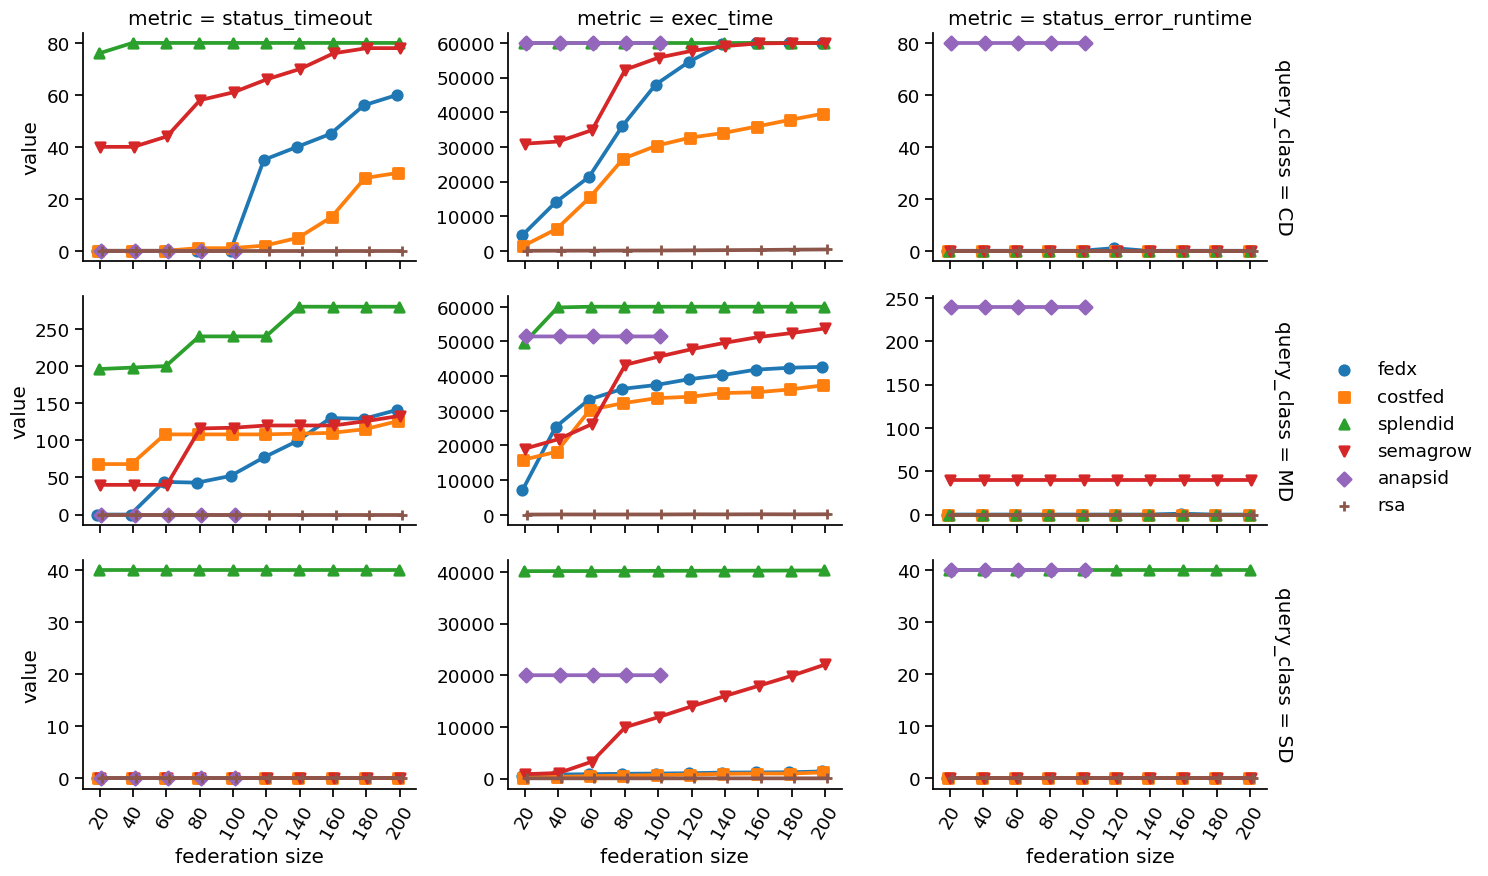

In [6]:
def set_xticklabels(*args, **kwargs):
    ax = plt.gca()
    ax.set_xticks(evaluation_metrics["batch"].unique())

    _, vendors_labels = np.histogram(np.arange(100), evaluation_metrics["batch"].nunique())
    vendors_labels = vendors_labels[1:].astype(int) + 1

    _, ratingsite_labels = np.histogram(np.arange(100), evaluation_metrics["batch"].nunique())
    ratingsite_labels = ratingsite_labels[1:].astype(int) + 1

    xticks = [ f"{vendor + ratingsite}" for vendor, ratingsite in zip(vendors_labels, ratingsite_labels) ]
    ax.set_xticklabels(xticks, rotation=60)

def doplot(x, y, data=None, **kwargs):
    import warnings
    warnings.filterwarnings("ignore", module = "seaborn\..*" )

    col = data["metric"].iloc[0]
    estimator = "sum" if col.startswith("status_") else "mean"

    # Fill tpwss NaN with existing values
    if col == "tpwss":
        data = data.interpolate(method="pad")

    # Cut off anapsid after 5 batches
    data["value"] = np.where(((data["engine"] == "anapsid") & (data["batch"] > 4)), np.inf, data["value"])

    # Push rsa to last position
    hue_order = [ e for e in data["engine"].unique() if e != "rsa" ] + ["rsa"]

    sns.pointplot(
        data=data, x=x, y=y, errorbar=None, hue="engine", estimator=estimator,
        hue_order = hue_order,
        markers=markers[:data["engine"].nunique()], dodge=True
    )

markers = ["o", "s", "^", "v", "D", "+", "x", "*", "p", "h", "X", "|", "_"]

evaluation_metrics["sts"] = evaluation_metrics["status"]
data = pd.get_dummies(evaluation_metrics, columns=["status"])
data = pd.melt(
    data, id_vars=["query", "engine", "batch", "instance", "query_class", "sts"], var_name="metric", value_name="value",
)
data = data.query("`metric` in ['status_timeout', 'exec_time', 'status_error_runtime'] and `engine` not in []")

with sns.plotting_context("notebook", font_scale=1.2):
    g = sns.FacetGrid(data, col="metric", row="query_class", col_order=['status_timeout', 'exec_time', 'status_error_runtime'], margin_titles=True, sharey=False, sharex=True, height=3, aspect=1.5)
    g.map_dataframe(doplot, x="batch", y="value")
    g.map(set_xticklabels, "batch")
    #g.tick_params(labelsize=12)
    g.set_xlabels("federation size")
    g.add_legend()

##  Engine performance query-by-query

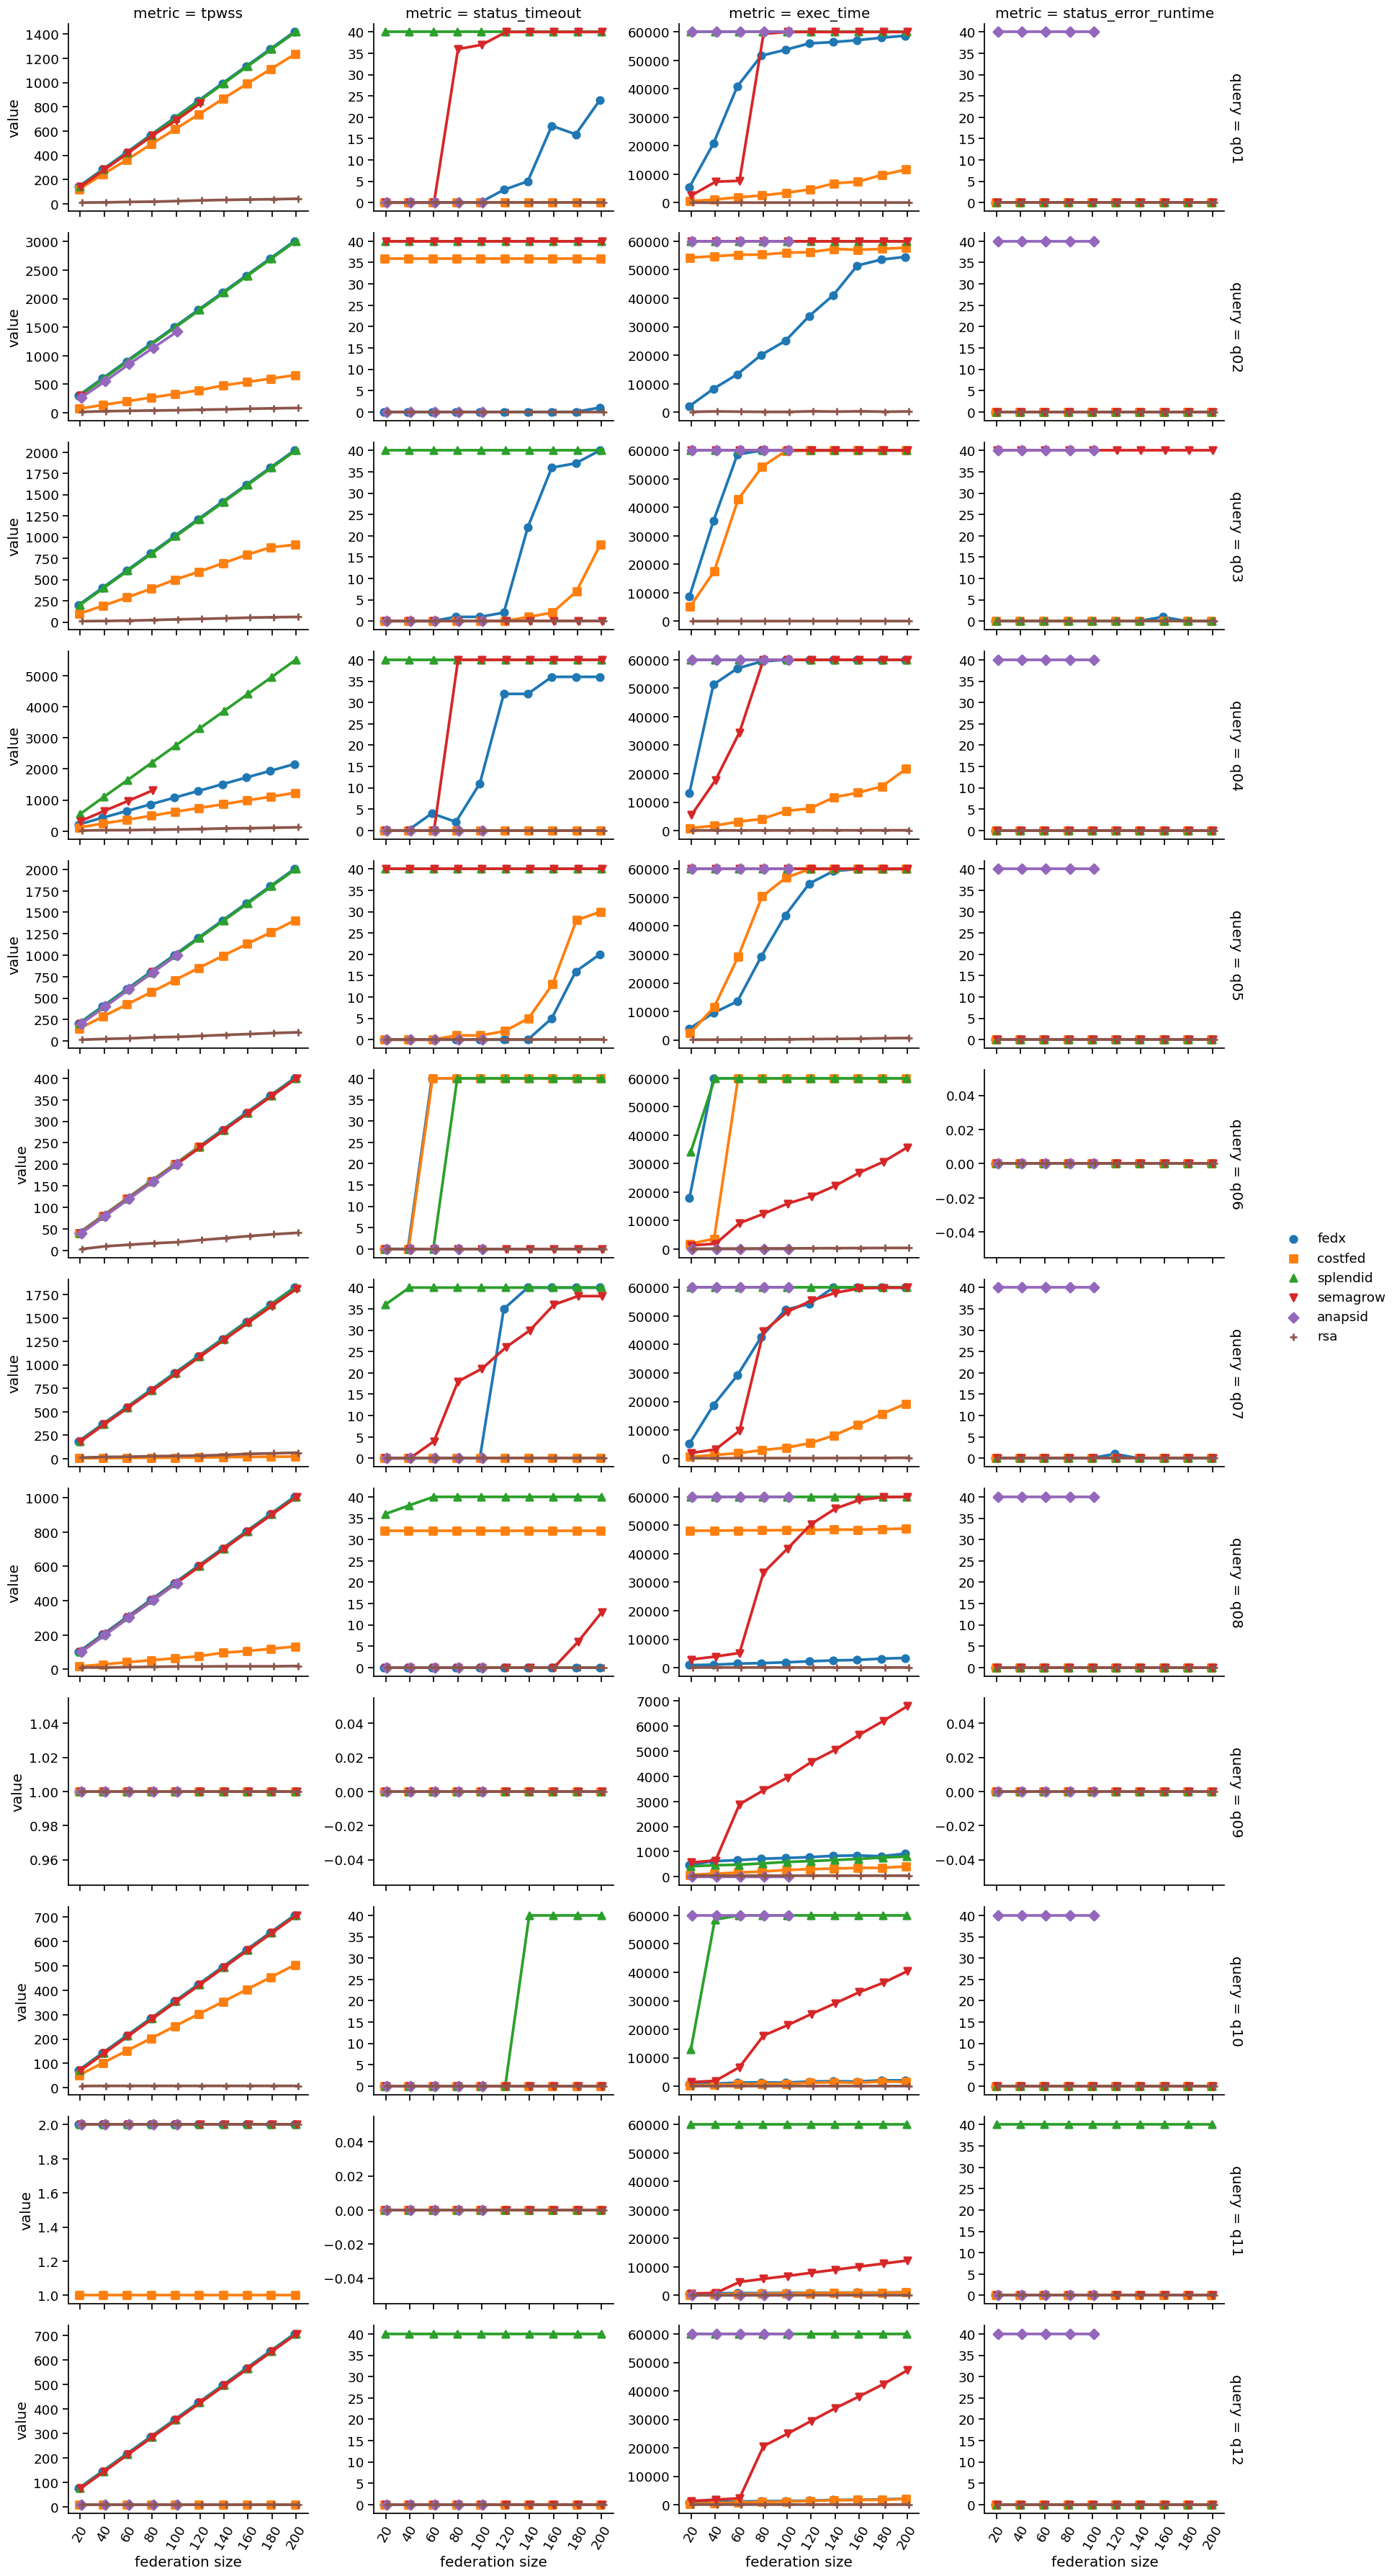

In [7]:
def set_xticklabels(*args, **kwargs):
    ax = plt.gca()
    ax.set_xticks(evaluation_metrics["batch"].unique())

    _, vendors_labels = np.histogram(np.arange(100), evaluation_metrics["batch"].nunique())
    vendors_labels = vendors_labels[1:].astype(int) + 1

    _, ratingsite_labels = np.histogram(np.arange(100), evaluation_metrics["batch"].nunique())
    ratingsite_labels = ratingsite_labels[1:].astype(int) + 1

    xticks = [ f"{vendor + ratingsite}" for vendor, ratingsite in zip(vendors_labels, ratingsite_labels) ]
    ax.set_xticklabels(xticks, rotation=60)

def doplot(x, y, data=None, **kwargs):
    import warnings
    warnings.filterwarnings("ignore", module = "seaborn\..*" )

    col = data["metric"].iloc[0]
    estimator = "sum" if col.startswith("status_") else "mean"


    data["value"] = np.where(((data["engine"] == "anapsid") & (data["batch"] > 4)), np.inf, data["value"])

    # Push rsa to last position
    hue_order = [ e for e in data["engine"].unique() if e != "rsa" ] + ["rsa"]

    sns.pointplot(
        data=data, x=x, y=y, errorbar=None, hue="engine", estimator=estimator,
        hue_order = hue_order,
        markers=markers[:data["engine"].nunique()], dodge=True,
    )


markers = ["o", "s", "^", "v", "D", "+", "x", "*", "p", "h", "X", "|", "_"]

evaluation_metrics["sts"] = evaluation_metrics["status"]
data = pd.get_dummies(evaluation_metrics, columns=["status"])
data = pd.melt(
    data, id_vars=["query", "engine", "batch", "instance", "query_class", "sts"], var_name="metric", value_name="value",
)
data = data.query("`metric` in ['tpwss', 'exec_time', 'status_timeout', 'status_error_runtime']")

with sns.plotting_context("notebook", font_scale=1.2):
    g = sns.FacetGrid(
        data, col_order=['tpwss', 'status_timeout', 'exec_time', 'status_error_runtime'],
        col="metric", row="query", margin_titles=True,
        sharey=False, sharex=True, height=3, aspect=1.5
    )
    g.map_dataframe(doplot, x="batch", y="value")
    g.map(set_xticklabels, "batch")
    g.set_xlabels("federation size")
    g.add_legend()